## **Importing Packages**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Initializing Parameters**

In [ ]:
"""
nx = neurons input layer
nh = neurons hidden layer
ny = neurons output layer
"""
def initialize_parameters(nx,nh,ny):
   
   #Setting a random seed so the same random values are generated every time we run this function.

    np.random.seed(1)

    
    #Initialize weights to small random numbers and biases to zeros for each layer.
    W1=(2*np.random.rand(nh,nx)-1)*0.01
    b1=np.zeros((nh,1))
    W2=np.random.rand(ny,nh)*0.01
    b2=np.zeros((ny,1))
   
    #Creating a dictionary of network parameters.
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

##**Forward Pass Function**

In [ ]:
#RelU Activation

def relu(z):
    return np.maximum(0,z)

#Sigmoid Activation

def sigmoid(z):
    a= 1/(1+np.exp(-z))
    return a

In [ ]:

def forward_pass(parameters,X):
    Z1= np.dot(parameters["W1"],X)+parameters["b1"] # b1 is broadcasted n times before it is added to np.dpt(W1,X1)
    A1=relu(Z1)
    Z2=np.dot(parameters["W2"],A1)+parameters["b2"] #b2 is broadcasted n times before it is added to np.dpt(W2,A1)
    Yhat=Z2
       
    cache = {"A1": A1,
             "Z1":Z1,
             "Z2": Z2}
    return Yhat,cache

##**Computing Loss with a Utility Method**

In [ ]:
def compute_loss(Y,Yhat):
   
    n=Y.shape[1]
    loss= np.square(np.subtract(Y, Yhat)).mean(axis= 1) 
    return loss


##**Backward Pass**

In [ ]:
'''
Y is the observed output and Yhat is the predicted output (i.e., output of the network)

Mean Squared Error derivative wrt Yhat is (Yhat-Y)
'''
def dMSELoss(Y,Yhat):
    return (Yhat-Y) 


'''
The derivative of sigmoid(A) with respect to A is A*(1-A) 
where * is elementwise multiplication 
'''
def dsigmoid(Z):
    A=sigmoid(Z)
    return (A*(1-A))


def drelu(Z):
    """
np.where(condition, x, y) for each element of the array returns x if condition is true otherwise returns y.
In this case for each element Z drelu=1 if the element is greater than 0 otherwise drelu=0
"""
    drelu=np.where(Z>0, 1.0, 0.0) 
    return drelu 


In [ ]:
#Backward Pass Function with MSE

def backward_pass(parameters, cache, X, Y, Yhat):
    n=X.shape[1]
    dZ2=dMSELoss(𝑌,Yhat)
    dW2=(1/n)*np.dot(dZ2,cache["A1"].T)
    db2=(1/n)*np.sum(dZ2, axis=1, keepdims=True)
    dA1=np.dot(parameters["W2"].T,dZ2)
    dZ1=dA1*drelu(cache["Z1"])
    dW1=(1/n)*np.dot(dZ1,X.T)
    db1=(1/n)*np.sum(dZ1, axis=1, keepdims=True)
    gradients={"dW1": dW1,
             "db1": db1,
             "dW2":dW2,
              "db2":db2
              }
    return gradients


##**Updating Parameters with Gradient Descent**

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"]=parameters["W1"]-learning_rate*gradients["dW1"]
    parameters["W2"]=parameters["W2"]-learning_rate*gradients["dW2"]
    parameters["b1"]=parameters["b1"]-learning_rate*gradients["db1"]
    parameters["b2"]=parameters["b2"]-learning_rate*gradients["db2"]
    return parameters

##**Creating the Neural Network Model**

In [ ]:
"""
Arguments: train_X: is the training dataset (features)
           train_Y: is the vector of labels for training_X
           val_X: is the vector of validation dataset (features)
           val_y: is the vector of labels for val_X
           nh: is the number of neurons in the hidden layer
           num_iterations: The number of iterations of gradient descent
"""
def create_nn_model(train_X,train_Y,nh, val_X, val_Y, num_iterations, learning_rate):
    """
    Do some safety check on the data before proceeding. 
    train_X and val_X must have the same number of features (i.e., same number of rows)
    train_X must have the same number of examples as train_Y (i.e., same number of columns )
    val_X must have the same number of examples as Val_Y
    """ 
    assert(train_X.shape[0]==val_X.shape[0]), "train_X and val_X must have the same number of features"
    assert(train_X.shape[1]==train_Y.size), "train_X and train_Y must have the same number of examples"
    assert(val_X.shape[1]==val_Y.size), "val_X and val_Y must have the same number of examples" 
    
    
    #getting the number of features
    nx=train_X.shape[0]
    
    #This network is used for a Regression problem, therefore we use one neuron for the output layer with NO ACTIVATION.
    ny=1
    
    # initializing the parameteres
    parameters=initialize_parameters(nx,nh,ny)
    
    
    #initialize lists to store the training and valideation losses for each iteration. 
    val_loss=[]
    train_loss=[]
    
    #run num_iterations of gradient descent
    for i in range (0, num_iterations):
        #run the forward pass on train_X
        Yhat_train, train_cache= forward_pass(parameters,train_X)
        
        #run the forward pass on val_X
        Yhat_val,val_cache= forward_pass(parameters,val_X)
        
        #compute the loss on the train and val datasets
        train_loss.append(compute_loss(train_Y,Yhat_train))
        val_loss.append(compute_loss(val_Y,Yhat_val))

        
        """
        run the backward pass. Note that the backward pass is only run on the training data not the validation data
        Because the learning must be only done on the training data and hence, validation data is not used to update
        the model parameters.  
        """
        gradients=backward_pass(parameters, train_cache, train_X, train_Y,Yhat_train)
        
        
        # update the parameters
        parameters=update_parameters(parameters, gradients, learning_rate)
        
        #print the training loss and validation loss for each iteration.
        print("iteration {} :train_loss:{} val_loss{}".format(i,train_loss[i],val_loss[i]))
        
    #create a dictionary history and put train_loss and validaiton_loss in it
    history={"val_loss": val_loss,
             "train_loss": train_loss}
        
        
        #return the parameters and the history
    return parameters, history

##**Applying the Neural Network Model to California Housing Dataset in order to predict Median House Values**

In [ ]:
#Reading Input Datasets 

train = pd.read_csv("sample_data/california_housing_train.csv")
val = pd.read_csv("sample_data/california_housing_test.csv")

In [ ]:
#Splitting the data

test = train.sample(frac=0.2)
train = train[~train.index.isin(test.index.tolist())]

print(train.shape)
print(test.shape)
print(val.shape)

(13600, 9)
(3400, 9)
(3000, 9)


In [ ]:
#Storing data in Numpy Arrays, separating features and target variable, and reshaping to 2D arrays.

train = train.to_numpy()
test = test.to_numpy()
val = val.to_numpy()

train_X=train[:,:-1]
train_Y=train[:,-1]
train_Y=np.reshape(train_Y, (1,train_Y.size))

test_X=test[:,:-1]
test_Y=test[:,-1]
test_Y=np.reshape(test_Y, (1,test_Y.size))

val_X=val[:,:-1]
val_Y=val[:,-1]
val_Y=np.reshape(val_Y, (1,val_Y.size))

In [ ]:
# Normalization of features and scaling down of target variable.

train_X = (train_X - train_X.mean(axis= 0)) / train_X.std(axis=0)
test_X = (test_X - test_X.mean(axis= 0)) / test_X.std(axis=0)
val_X = (val_X - val_X.mean(axis= 0)) / val_X.std(axis=0)

train_Y = train_Y / 100000
test_Y = test_Y / 100000
val_Y = val_Y / 100000

In [ ]:
iterations=300
parameters, history=create_nn_model(train_X.T,train_Y, 40, test_X.T, test_Y, iterations, 0.01)

iteration 0 :train_loss:[5.58982853] val_loss[5.82548915]
iteration 1 :train_loss:[5.50489236] val_loss[5.73880492]
iteration 2 :train_loss:[5.42164351] val_loss[5.65382541]
iteration 3 :train_loss:[5.34004832] val_loss[5.57051682]
iteration 4 :train_loss:[5.26007375] val_loss[5.48884595]
iteration 5 :train_loss:[5.1816875] val_loss[5.40878034]
iteration 6 :train_loss:[5.1048579] val_loss[5.33028813]
iteration 7 :train_loss:[5.02955386] val_loss[5.25333805]
iteration 8 :train_loss:[4.95574497] val_loss[5.17789949]
iteration 9 :train_loss:[4.88340144] val_loss[5.1039425]
iteration 10 :train_loss:[4.81249396] val_loss[5.03143768]
iteration 11 :train_loss:[4.74299393] val_loss[4.96035621]
iteration 12 :train_loss:[4.67487323] val_loss[4.89066983]
iteration 13 :train_loss:[4.60810437] val_loss[4.82235087]
iteration 14 :train_loss:[4.54266042] val_loss[4.75537225]
iteration 15 :train_loss:[4.47851494] val_loss[4.68970739]
iteration 16 :train_loss:[4.41564199] val_loss[4.62533023]
iteration 

##**Plotting the Validation and Training Loss per Iteration of Gradient Descent**

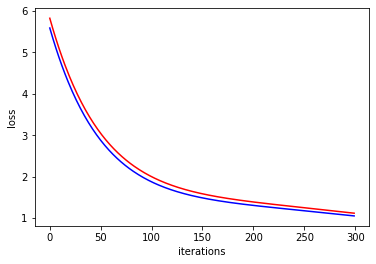

In [ ]:
plt.plot(range(0,iterations),history["train_loss"],'b')
plt.plot(range(0,iterations),history["val_loss"],'r')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

**NOTE**: Above is the Learning Curve, illustrated by validation and training loss per iteration of gradient descent.

We can see from the curve that the training loss (blue curve) and validation loss (red curve) are nearly identical, and can therefore deduce that the model does NOT overfit.

The validation loss flattens out toward iteration no. 150 and further. 

It can be said that the validation loss is monotonically decreasing (after iteration no. 150) as we increase the number of iterations.

##**Tuning Hyper-Parameters**

In [ ]:

parameters, history=create_nn_model(train_X.T,train_Y, 30, test_X.T, test_Y, 200, 0.01)
loss1 = min(history['val_loss'])

parameters, history=create_nn_model(train_X.T,train_Y, 40, test_X.T, test_Y, 300, 0.001)
loss2 = min(history['val_loss'])

parameters, history=create_nn_model(train_X.T,train_Y, 60, test_X.T, test_Y, 400, 0.001)
loss3 = min(history['val_loss'])

parameters, history=create_nn_model(train_X.T,train_Y, 80, test_X.T, test_Y, 200, 0.1)
loss4 = min(history['val_loss'])



print('Loss #1:', loss1)
print('Loss #2:', loss2)
print('Loss #3:', loss3)
print('Loss #4:', loss4)

iteration 0 :train_loss:[5.59098077] val_loss[5.8266628]
iteration 1 :train_loss:[5.50607117] val_loss[5.74000554]
iteration 2 :train_loss:[5.42284901] val_loss[5.65505313]
iteration 3 :train_loss:[5.34128065] val_loss[5.57177178]
iteration 4 :train_loss:[5.26133308] val_loss[5.49012832]
iteration 5 :train_loss:[5.18297401] val_loss[5.41009029]
iteration 6 :train_loss:[5.10617176] val_loss[5.33162584]
iteration 7 :train_loss:[5.03089533] val_loss[5.25470379]
iteration 8 :train_loss:[4.95711428] val_loss[5.17929354]
iteration 9 :train_loss:[4.8847988] val_loss[5.10536507]
iteration 10 :train_loss:[4.81391966] val_loss[5.03288903]
iteration 11 :train_loss:[4.74444828] val_loss[4.96183668]
iteration 12 :train_loss:[4.67635657] val_loss[4.89217979]
iteration 13 :train_loss:[4.609617] val_loss[4.82389062]
iteration 14 :train_loss:[4.54420263] val_loss[4.75694209]
iteration 15 :train_loss:[4.48008704] val_loss[4.6913076]
iteration 16 :train_loss:[4.41724436] val_loss[4.62696114]
iteration 17

**NOTE**: Loss #4 gives us a value of 0.48560569 as validation loss. 

Therefore, out of the few hyper-parameter combinations computed, we can say that the combination of 80 neurons, 200 iterations and the learning rate of 0.1 gives us a comparitively desirable value for validation loss.

In [ ]:
parameters, history=create_nn_model(train_X.T, train_Y, 80, val_X.T, val_Y, 200, 0.1)

iteration 0 :train_loss:[5.66228301] val_loss[5.50639025]
iteration 1 :train_loss:[4.83925205] val_loss[4.69164222]
iteration 2 :train_loss:[4.17212697] val_loss[4.03198427]
iteration 3 :train_loss:[3.63117266] val_loss[3.49776618]
iteration 4 :train_loss:[3.19233085] val_loss[3.06500583]
iteration 5 :train_loss:[2.83611888] val_loss[2.71429437]
iteration 6 :train_loss:[2.54674819] val_loss[2.42991024]
iteration 7 :train_loss:[2.31141778] val_loss[2.19910807]
iteration 8 :train_loss:[2.11973737] val_loss[2.01155005]
iteration 9 :train_loss:[1.96326676] val_loss[1.85884911]
iteration 10 :train_loss:[1.83514284] val_loss[1.7341886]
iteration 11 :train_loss:[1.72978053] val_loss[1.63202412]
iteration 12 :train_loss:[1.64262764] val_loss[1.54783959]
iteration 13 :train_loss:[1.56997594] val_loss[1.47796202]
iteration 14 :train_loss:[1.50879257] val_loss[1.41939604]
iteration 15 :train_loss:[1.45660823] val_loss[1.36970096]
iteration 16 :train_loss:[1.41140991] val_loss[1.32688997]
iteratio

In [ ]:
#Using the latest and optimized weights for Forward Pass

def predict(parameters,X):
    Yhat,cache=forward_pass(parameters, X)
    return Yhat

##**Computing Mean Absolute Percentage Error - Neural Network**

In [ ]:
def MAPE(predictedY, observedY):
    return np.divide(np.abs(np.subtract(observedY, predictedY)), observedY).mean(axis= 1) 

In [ ]:
predicted_val=predict(parameters, val_X.T)

print("Mean Absolute Percentage Error:", MAPE(predicted_val, val_Y))

Mean Absolute Percentage Error: [0.30327025]


##**Computing Mean Absolute Percentage Error - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_Y.flatten())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predY = model.predict(val_X)
print("Mean Absolute Percentage Error:", MAPE(predY, val_Y))

Mean Absolute Percentage Error: [0.29978086]


**NOTE**: The Linear Regression model performs better on the dataset with a value of 0.29978086 in comparison to an undesirable higher value achieved via the NN model : 0.30327025.